In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_theme(style="darkgrid")

In [93]:
import kagglehub
path = kagglehub.dataset_download("uciml/autompg-dataset")
print("Path to dataset files:", path)

Path to dataset files: /home/arpan/.cache/kagglehub/datasets/uciml/autompg-dataset/versions/3


In [94]:
autompg = pd.read_csv(f"{path}/auto-mpg.csv")
autompg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [95]:
autompg.replace('?', np.nan, inplace=True)
autompg.dropna(inplace=True)
autompg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [96]:
autompg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [97]:
autompg['horsepower'] = pd.to_numeric(autompg['horsepower'])
autompg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


/tmp/ipykernel_5249/3335656454.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = autompg.corr()


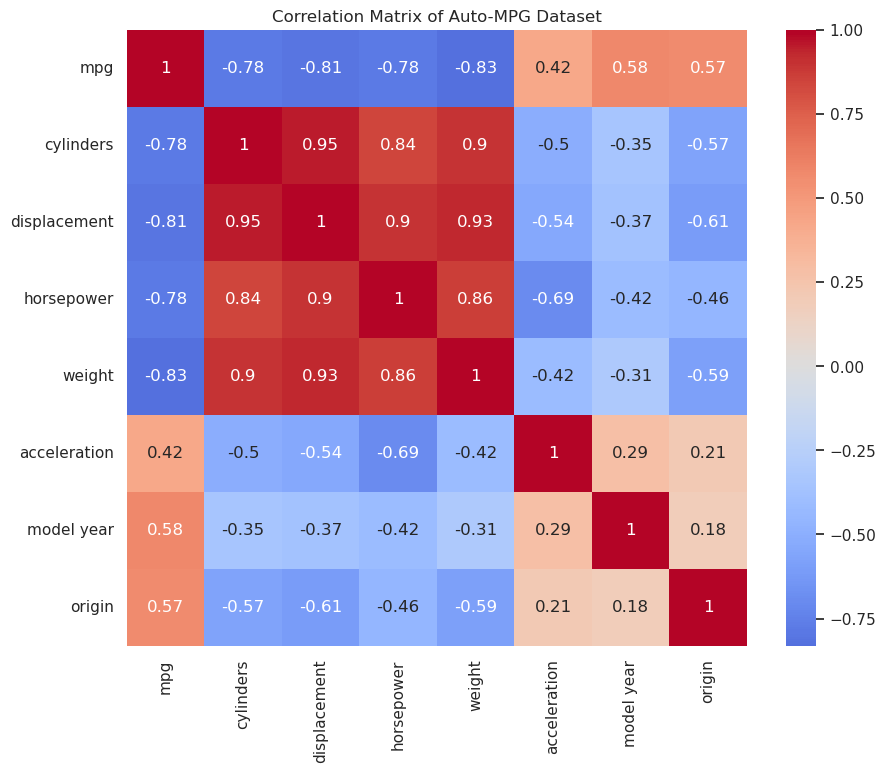

In [98]:
corr_matrix = autompg.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Auto-MPG Dataset')
plt.show()


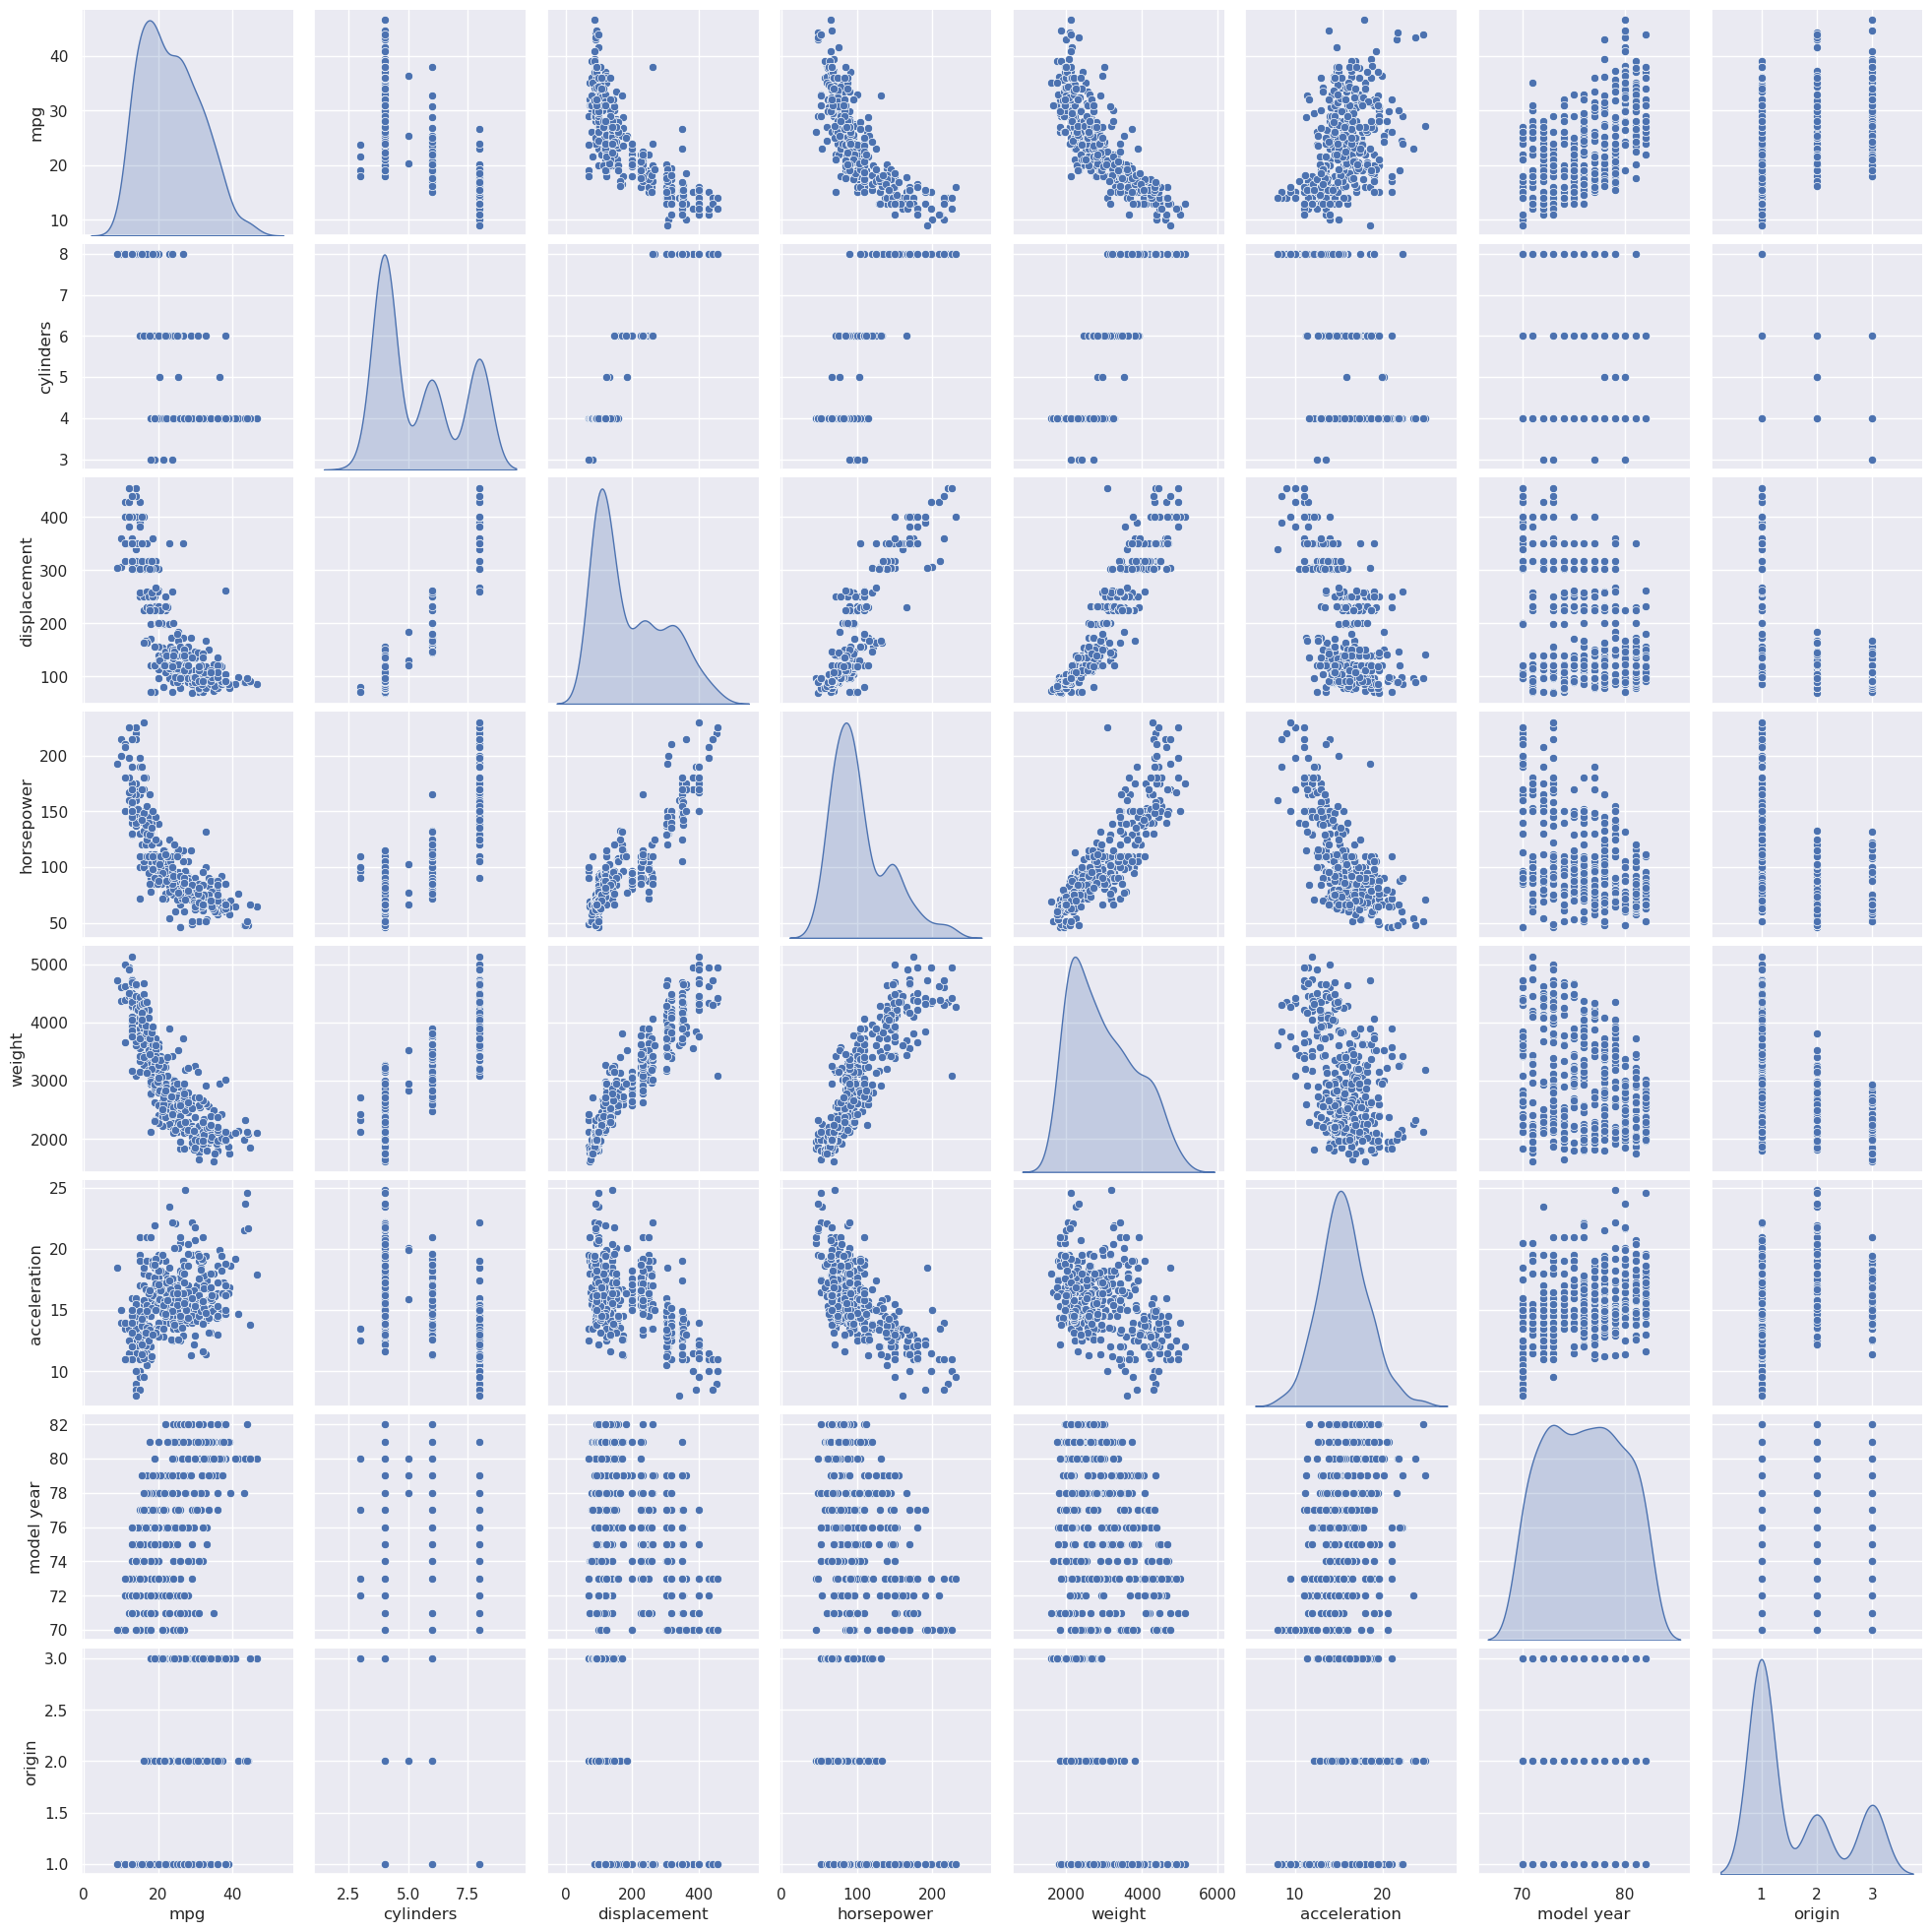

In [127]:
sns.pairplot(autompg, diag_kind='kde')

In [100]:
autompg.drop(columns=['car name'], axis=1, inplace=True)
autompg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


# Linear Regression

Normalize

In [101]:
autompg.apply(pd.to_numeric, errors='coerce')
autompg.dropna(inplace=True)
X = autompg.drop('mpg', axis=1)
y = autompg['mpg']

In [102]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


In [103]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [104]:
def normalize(X):
    # Convert all columns to numeric, coercing errors to NaN
    X = X.apply(pd.to_numeric, errors='coerce')
    
    # Drop rows with NaN values
    X.dropna(inplace=True)
    
    # Normalize the DataFrame
    for i in X.columns:
        X.loc[:, i] = (X[i] - X[i].mean()) / X[i].std()
            
    return X

Gradient Descend

In [105]:
def gradient_descend(X, y, learning_rate = 0.01, n_iter = 1000):
    # X = normalize(X)
    X = np.c_[np.ones(X.shape[0]), X]
    theta = np.zeros(X.shape[1])
    m = X.shape[0]
    
    for i in range(n_iter):
        h = X @ theta
        loss = (h - y)
        gradient = X.T @ loss / m
        theta = theta - (learning_rate * gradient)
    return theta

In [106]:
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    int64  
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model year    392 non-null    int64  
 6   origin        392 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 24.5 KB
None
<class 'pandas.core.series.Series'>
Int64Index: 392 entries, 0 to 397
Series name: mpg
Non-Null Count  Dtype  
--------------  -----  
392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


In [107]:
gradient_descend(X,y)


array([23.44490618, -0.51386234, -0.23026897, -1.14164229, -3.40112528,
       -0.2945607 ,  2.62931422,  1.05065825])

# Define Fitness Function

Here we are using $\textbf{Akaike Information Criterion}$ which is given by the formula
    
$AIC = 2k - 2ln(\hat{L})$

where $k$ = number of estimated parameters 
      $\hat{L}$ = maximised value of likelihood function
 

In [108]:
def rss(X,y,theta):
    # X = normalize(X)
    X = np.c_[np.ones(X.shape[0]), X]
    residual_sum_squares = sum(((X @ theta) - y)**2)
    return residual_sum_squares

def calculate_aic(X,y,theta):
    n = len(y)
    aic = 2 * X.shape[1] + n * np.log(rss(X,y,theta) / n)
    return aic    

In [109]:
calculate_aic(X,y,gradient_descend(X,y))

965.5743836362818

# Generate Parent Population

In [110]:
def parent_pops(X,size):
    papa_pops = []
    for i in range(size):
        feature_arrs = np.random.choice([True,False],size = X.shape[1])
        papa_pops.append(X.iloc[:, np.where(feature_arrs)[0]])
    return papa_pops

In [111]:
parent_pops(autompg, 5)

[     cylinders  displacement  model year  origin
 0            8         307.0          70       1
 1            8         350.0          70       1
 2            8         318.0          70       1
 3            8         304.0          70       1
 4            8         302.0          70       1
 ..         ...           ...         ...     ...
 393          4         140.0          82       1
 394          4          97.0          82       2
 395          4         135.0          82       1
 396          4         120.0          82       1
 397          4         119.0          82       1
 
 [392 rows x 4 columns],
       mpg  horsepower  model year
 0    18.0         130          70
 1    15.0         165          70
 2    18.0         150          70
 3    16.0         150          70
 4    17.0         140          70
 ..    ...         ...         ...
 393  27.0          86          82
 394  44.0          52          82
 395  32.0          84          82
 396  28.0          79 

# Calculate Fitness Score

In [112]:
def parent_score(parents, y):
    pop_score = {}
    temp_var = 0
    for parent in parents:
        theta1 = gradient_descend(parent, y, learning_rate = 0.01, n_iter = 1000)
        aic = calculate_aic(parent, y, theta1)
        pop_score[temp_var] = aic
        temp_var += 1
    return pop_score

# Select n Fittest Parents

In [113]:
def fittest_parents(population,lamda,y):

    parent_scores = parent_score(population,y)
    fittest_parent = []
    sorted_parents = sorted(parent_scores.items(), key = lambda x:x[1])
    top_lamda_parents_indices = sorted_parents[:lamda]
    top_lamda_parents = [item[0] for item in top_lamda_parents_indices]
    
    for i in top_lamda_parents:
        fittest_parent.append(population[i])
    return fittest_parent

In [114]:
# def fittest_parents(population, no_parents_selected, y):
#     parent_scores = parent_score(population, y)
#     sorted_parents = sorted(parent_scores.items(), key=lambda x: x[1], reverse=True)
#     unique_parents = []
#     selected_indices = set()
    
#     for parent, score in sorted_parents:
#         if len(unique_parents) >= no_parents_selected:
#             break
#         if parent not in selected_indices:
#             unique_parents.append(parent)
#             selected_indices.add(parent)
    
#     return unique_parents

In [115]:
parents = parent_pops(X, 5)
parents

[     cylinders  displacement  horsepower  acceleration  model year  origin
 0            8         307.0         130          12.0          70       1
 1            8         350.0         165          11.5          70       1
 2            8         318.0         150          11.0          70       1
 3            8         304.0         150          12.0          70       1
 4            8         302.0         140          10.5          70       1
 ..         ...           ...         ...           ...         ...     ...
 393          4         140.0          86          15.6          82       1
 394          4          97.0          52          24.6          82       2
 395          4         135.0          84          11.6          82       1
 396          4         120.0          79          18.6          82       1
 397          4         119.0          82          19.4          82       1
 
 [392 rows x 6 columns],
      cylinders  displacement  horsepower  weight  model year

In [116]:
parent_score(parents, y)


{0: 1037.5882339335615,
 1: 983.1075242692475,
 2: 1207.9652616551577,
 3: 1141.0731448337913,
 4: 1199.4524533773597}

In [117]:
parent_score(fittest_parents(parents, 2, y), y)

{0: 983.1075242692475, 1: 1037.5882339335615}

In [118]:
fittest_parents(parents, 2, y)

[     cylinders  displacement  horsepower  weight  model year
 0            8         307.0         130    3504          70
 1            8         350.0         165    3693          70
 2            8         318.0         150    3436          70
 3            8         304.0         150    3433          70
 4            8         302.0         140    3449          70
 ..         ...           ...         ...     ...         ...
 393          4         140.0          86    2790          82
 394          4          97.0          52    2130          82
 395          4         135.0          84    2295          82
 396          4         120.0          79    2625          82
 397          4         119.0          82    2720          82
 
 [392 rows x 5 columns],
      cylinders  displacement  horsepower  acceleration  model year  origin
 0            8         307.0         130          12.0          70       1
 1            8         350.0         165          11.5          70       1
 

# Uniform Crossover

In [119]:
def uniform_crossover(X,parent1, parent2):

    # X = data.drop(target_variable, axis = 1)
    parent_list1 = parent1.columns.tolist()
    # temp = 0
    
    bool_arr1 = np.zeros(X.shape[1])
    for i in parent_list1:
        bool_arr1[X.columns.get_loc(i)] = 1
        
    bool_arr2 = np.zeros(X.shape[1])
    parent_list2 = parent2.columns.tolist()
    for i in parent_list2:
        bool_arr2[X.columns.get_loc(i)] = 1
        
    for i in range(len(bool_arr1)):
        if np.random.uniform() >= 0.5:
            temp = bool_arr1[i]
            bool_arr1[i] = bool_arr2[i]
            bool_arr2[i] = temp
            continue
            
    new_parent1 = X.iloc[:, np.where(bool_arr1)[0]]
    new_parent2 = X.iloc[:, np.where(bool_arr2)[0]]
    return  new_parent1, new_parent2

In [120]:
parent1 = fittest_parents(parents, 2, y)[0]
parent2 = fittest_parents(parents, 2, y)[1]
uniform_crossover(X,parent1, parent2)

(     cylinders  displacement  horsepower  weight  model year
 0            8         307.0         130    3504          70
 1            8         350.0         165    3693          70
 2            8         318.0         150    3436          70
 3            8         304.0         150    3433          70
 4            8         302.0         140    3449          70
 ..         ...           ...         ...     ...         ...
 393          4         140.0          86    2790          82
 394          4          97.0          52    2130          82
 395          4         135.0          84    2295          82
 396          4         120.0          79    2625          82
 397          4         119.0          82    2720          82
 
 [392 rows x 5 columns],
      cylinders  displacement  horsepower  acceleration  model year  origin
 0            8         307.0         130          12.0          70       1
 1            8         350.0         165          11.5          70       1
 

# Random Bit-Flip Mutation

In [121]:
def rbf_mutation(X,parent1, parent2,mutation_rate):
    
    bool_arr1 = np.zeros(X.shape[1])
    parent_list1 = parent1.columns.tolist()
    for i in parent_list1:
        bool_arr1[X.columns.get_loc(i)] = 1
        
    bool_arr2 = np.zeros(X.shape[1])
    parent_list2 = parent2.columns.tolist()
    for i in parent_list2:
        bool_arr2[X.columns.get_loc(i)] = 1
        
    for i in range(len(bool_arr1)):
        if mutation_rate > np.random.normal(loc = .5, scale = .25, size = 1):
            bool_arr1[i] = 1-bool_arr1[i]
            continue
    for i in range(len(bool_arr2)):
        if mutation_rate > np.random.normal(loc = .5, scale = .25, size = 1):
            bool_arr2[i] = 1-bool_arr2[i]
            continue
            
    new_parent1 = X.iloc[:, np.where(bool_arr1)[0]]
    new_parent2 = X.iloc[:, np.where(bool_arr2)[0]]    
    
    return new_parent1, new_parent2

In [122]:
# def uniform_crossover(X, parent1, parent2):
#     offspring1 = parent1.copy()
#     offspring2 = parent2.copy()
#     for col in X.columns:
#         if np.random.uniform() < 0.5:
#             offspring1[col], offspring2[col] = offspring2[col], offspring1[col]
#     return offspring1, offspring2

# def rbf_mutation(X, parent1, parent2, mutation_rate):
#     offspring1 = parent1.copy()
#     offspring2 = parent2.copy()
#     for col in X.columns:
#         if np.random.uniform() < mutation_rate:
#             offspring1[col] += np.random.normal(0, 1) * X[col].std()
#         if np.random.uniform() < mutation_rate:
#             offspring2[col] += np.random.normal(0, 1) * X[col].std()
#     return offspring1, offspring2

# The $(\mu , \lambda)$ Genetic Algorithm



In [141]:
def gen_alg(X, y, pop_size, no_parents_selected, iterations, mutation_rate): 
    population = parent_pops(X, pop_size)
    
    for z in range(iterations):
        print("iteration:", z)
        parents = fittest_parents(population, no_parents_selected, y)
        # print("parents:", parents)
        new_gen = []
        for i in range(len(parents)):
            for j in range(i + 1, len(parents)):
                parent1 = parents[i]
                parent2 = parents[j]
                
                if np.random.uniform() < 0.5:
                    print("parent1:", parent1)
                    print("parent2:", parent2)
                    offspring1, offspring2 = uniform_crossover(X, parent1, parent2)
                else:
                    print("parent1:", parent1)
                    print("parent2:", parent2)
                    offspring1, offspring2 = rbf_mutation(X, parent1, parent2, mutation_rate)
                    print("offspring1:", offspring1)
                    print("offspring2:", offspring2)
                
                new_gen.append(offspring1)
                new_gen.append(offspring2)

                
        population = new_gen
    print('final population =', population)
    return fittest_parents(population, 1, y)


In [142]:

fittest_parent = gen_alg(X, y,10, 5, 10, 0.5)

# Print the fittest parent
print("Fittest Parent:")
fittest_parent


iteration: 0
parent1:      cylinders  weight  model year  origin
0            8    3504          70       1
1            8    3693          70       1
2            8    3436          70       1
3            8    3433          70       1
4            8    3449          70       1
..         ...     ...         ...     ...
393          4    2790          82       1
394          4    2130          82       2
395          4    2295          82       1
396          4    2625          82       1
397          4    2720          82       1

[392 rows x 4 columns]
parent2:      cylinders  displacement  weight  model year  origin
0            8         307.0    3504          70       1
1            8         350.0    3693          70       1
2            8         318.0    3436          70       1
3            8         304.0    3433          70       1
4            8         302.0    3449          70       1
..         ...           ...     ...         ...     ...
393          4         140.0  

[     weight  model year  origin
 0      3504          70       1
 1      3693          70       1
 2      3436          70       1
 3      3433          70       1
 4      3449          70       1
 ..      ...         ...     ...
 393    2790          82       1
 394    2130          82       2
 395    2295          82       1
 396    2625          82       1
 397    2720          82       1
 
 [392 rows x 3 columns]]

In [125]:
calculate_aic(fittest_parent[0], y, gradient_descend(fittest_parent[0], y))

949.2769770348796

In [126]:
rss(fittest_parent[0], y, gradient_descend(fittest_parent[0], y))

4348.475742948265